In [1]:
# implementation of the closest centroid classifier and visualization


from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np 

class closest_centroid:
    def __init__(self):
        pass
    def train(self,x,y):
        self.labels = np.unique(y)
        self.centroids = np.array([x[y==i].mean(axis=0)
                                  for i in self.labels])
    def predict(self,x):
        distances = np.array([np.linalg.norm(model.centroids[c]-x,axis=1)
                             for c in self.labels])
        return distances.argmin(axis=0)


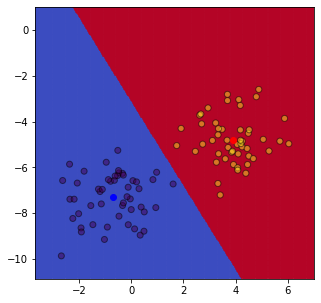

In [2]:
plt.figure(figsize=(5,5))
x, y = make_blobs(n_samples=100, centers=2)

xmin, xmax = min(0,x[:,0].min()), max(0, x[:,0].max())
ymin, ymax = min(0, x[:,1].min()), max(0, x[:,1].max())

model = closest_centroid()
model.train(x,y)

xx, yy = np.meshgrid(np.arange(xmin-1,xmax+1, 0.02),
                    np.arange(ymin-1, ymax+1, 0.02))
P = model.predict(np.c_[xx.ravel(), yy.ravel()])
P = P.reshape(xx.shape)

plt.pcolormesh(xx,yy,P, cmap='coolwarm', shading='auto', alpha=0.5)
plt.scatter(x[:,0], x[:,1], c=y, edgecolor='k', alpha=0.5)
plt.plot(model.centroids[0][0], model.centroids[0][1], 'ob')
plt.plot(model.centroids[1][0], model.centroids[1][1], 'or')

In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)
X = data.values[:, :13]
y_original = data.values[:,13]
# X now contains the features; you will need to modify the original labels
# y_orginal to binary labels (healthy vs non-healthy)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
X.shape, y_original.shape

((303, 13), (303,))

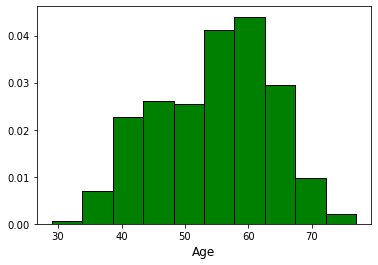

In [5]:
# it should include relevant plots and the Python code to generate them
import matplotlib.pyplot as plt
import numpy as np
#data.plot.hist(bins=20, alpha=0.7)
#plt.scatter(X[:,0], X[:,1], c=y_original, alpha=0.5, s=50);
#data[0]
#num_bins = 50
plt.hist(data[0], density=True, facecolor='green',  
      edgecolor = 'black', label='Age');
plt.xlabel('Age',fontsize=12);

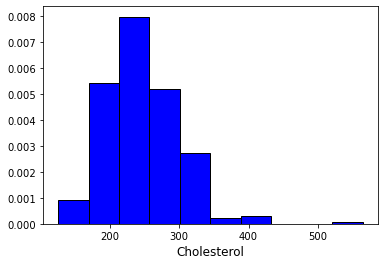

In [6]:
plt.hist(data[4], density=True, facecolor='blue',
      edgecolor = 'black', label='Cholesterol');
plt.xlabel('Cholesterol',fontsize=12);

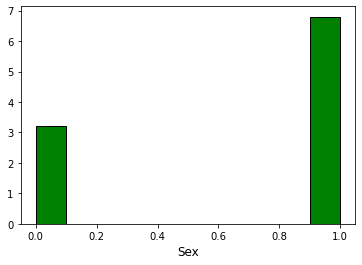

In [7]:
plt.hist(data[1], density=True, facecolor='green',
      edgecolor = 'black', label='Sex');
plt.xlabel('Sex',fontsize=12);

In [1]:
plt.hist(data[2], density=True, facecolor='blue',
      edgecolor = 'black', label='Chest Pain Type');
plt.xlabel('Chest Pain Type',fontsize=12);

NameError: name 'plt' is not defined

Splitting data into train and test sets



In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def train_test_split(X, y, test_fraction=0.2):
    """
    split the given dataset into training and test sets
    
    arguments:
        X - two dimensional Numpy array that contains the feature matrix
        y - a Numpy array that contains the labels
        test_fraction - the fraction of data to be used as the test set.
        This is a number between 0 and 1.
    
    return value:
        the function returns a tuple of four Numpy arrays:
        X_train,y_train,X_test,y_test where X_train,y_train are 
        the features and labels for the training set and X_test,y_test
        are the features and labels for the test set.
    """
   # return np.random.rand(8, 2),np.random.randint(0, 2,size=(8,)),np.random.rand(2, 2),np.random.randint(0, 2,size=(2,)),

i = -int(test_fraction*y.size)
rng = np.random.default_rng()
data = np.c_[X,y]
rng.shuffle(data)

return (data[:i,:-1],data[:i,-1],data[i:,:-1],data[i:,-1])


NameError: name 'test_fraction' is not defined

In [ ]:
#Next

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def train_test_split(X, y, test_fraction=0.2):
    test_size = int(test_fraction*len(y))
    rng = np.random.default_rng()
    permutation = np.arange(len(y))
    rng.shuffle(permutation)
    X_shuffle = X[permutation]
    y_shuffle = y[permutation]
    return (X_shuffle[:-test_size],y_shuffle[:-test_size],
           X_shuffle[-test_size:], y[-test_size:])

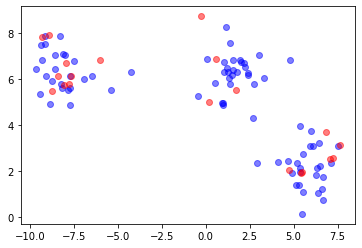

In [13]:
X, y = make_blobs(n_samples=100, n_features=2)
xtr, ytr, xt, yt = train_test_split(X,y)
plt.scatter(xtr[:,0], xtr[:,1], c='b', alpha=0.5)
plt.scatter(xt[:,0], xt[:,1], c='r', alpha=0.5)

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def train_test_split(X, y, test_fraction=0.2):
    
    test_size = int(test_fraction*len(y))
    rng = np.random.default_rng()
    permutation = np.arange(len(y))
    rng.shuffle(permutation)
    X_shuffle = X[permutation]
    y_shuffle = y[permutation]
    return (X_shuffle[:-test_size],y_shuffle[:-test_size],
           X_shuffle[-test_size], y[-test_size:])

IndexError: too many indices for array

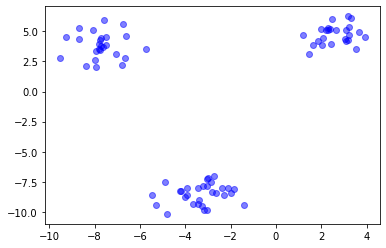

In [11]:
X, y = make_blobs(n_samples=100, n_features=2)
xtr, ytr, xt, yt = train_test_split(X,y)
plt.scatter(xtr[:,0], xtr[:,1], c='b', alpha=0.5)
plt.scatter(xt[:,0], xt[:,1], c='r', alpha=0.5)